# Experimento Desenrollando Loops

### Compilamos

In [ ]:
#RECOMENDAMOS CORRER EN CONSOLA, TIENE MUCHO OUTPUT
!cd .. && make clean && ./build_experimentos.sh

In [34]:
ASM_rolinga = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
ASM_norolinga = {
    '400x300':[], '800x600':[],  '1600x1200':[], '1280x960':[], '256x128':[], '128x64':[], '1024x768':[],
}
labels = ['128x64', '256x128', '400x300', '800x600', '1024x768', '1280x960', '1600x1200']

f = open(f'../log/ASM_ROL_ImagenFantasma.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        ASM_rolinga[x].append(float(l.split('\t')[8]))
    
f = open(f'../log/ASM_ImagenFantasma.log', "r")
seguir = True
while seguir:
    for x in labels:
        l = f.readline().rstrip("\n")
        if not l:
            seguir = False
            break
        ASM_norolinga[x].append(float(l.split('\t')[8]))

In [35]:
import numpy as np
asm1 = [] 
asm2 = [] 
asm1err = []
asm2err = []
for x in labels:
    asm1.append(np.mean(ASM_rolinga[x]))
    asm2.append(np.mean(ASM_norolinga[x]))
    asm1err.append(2*np.std(ASM_rolinga[x]))
    asm2err.append(2*np.std(ASM_norolinga[x]))

### Graficamos

In [36]:
import matplotlib.pyplot as plt
from functools import reduce 
plt.rcParams['figure.figsize'] = [18, 8]

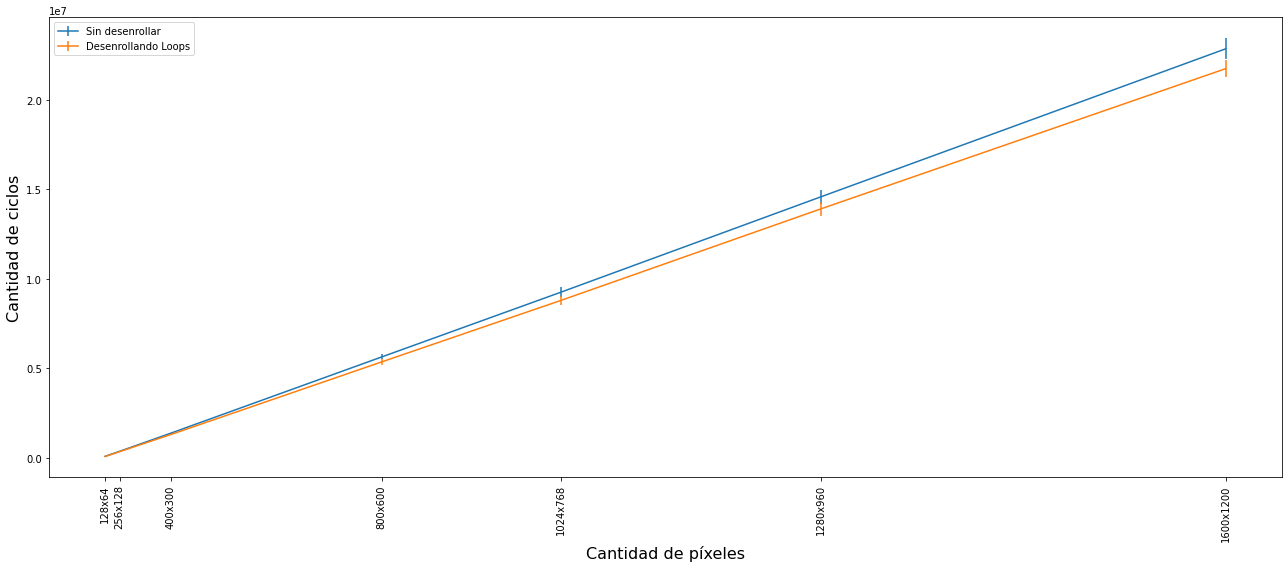

In [37]:
labelsSizes = [reduce(lambda x,y : x*y, map(int,label.split('x'))) for label in labels]
plt.errorbar(labelsSizes, asm1, yerr=asm1err, label='Sin desenrollar')
plt.errorbar(labelsSizes, asm2, yerr=asm2err, label='Desenrollando Loops')
plt.xticks(labelsSizes, labels, rotation=90, fontsize=10)
plt.legend(loc="upper left")
plt.xlabel('Cantidad de píxeles', fontsize=16)
plt.ylabel('Cantidad de ciclos', fontsize=16)
plt.tight_layout()
plt.show()